In [366]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA, NMF
from sklearn.manifold import TSNE
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import TruncatedSVD
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import seaborn as sns


In [367]:
# Wczytanie danych
df = pd.read_csv('Dataset-Mental-Disorders.csv')
n = 3
# Wyświetlenie pierwszych wierszy
print(df.head())

# Wnioskowanie:
# Zbiór danych zawiera różne cechy związane ze zdrowiem psychicznym studentów.
# Przed przystąpieniem do analizy należy sprawdzić brakujące wartości i typy danych.


  Patient Number    Sadness    Euphoric  Exhausted Sleep dissorder Mood Swing  \
0     Patiant-01    Usually      Seldom  Sometimes       Sometimes        YES   
1     Patiant-02    Usually      Seldom    Usually       Sometimes         NO   
2     Patiant-03  Sometimes  Most-Often  Sometimes       Sometimes        YES   
3     Patiant-04    Usually      Seldom    Usually      Most-Often        YES   
4     Patiant-05    Usually     Usually  Sometimes       Sometimes         NO   

  Suicidal thoughts Anorxia Authority Respect Try-Explanation  \
0              YES       NO                NO             YES   
1               YES      NO                NO              NO   
2                NO      NO                NO             YES   
3               YES     YES                NO             YES   
4                NO      NO                NO              NO   

  Aggressive Response Ignore & Move-On Nervous Break-down Admit Mistakes  \
0                  NO               NO        

In [368]:
# Usunięcie wierszy z brakującymi wartościami
df = df.dropna()

le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])

# Wybór cech numerycznych
X = df.select_dtypes(include=['float64', 'int64'])

# Standaryzacja danych
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Wnioskowanie:
# Dane zostały oczyszczone i przeskalowane, co jest niezbędne przed zastosowaniem technik redukcji wymiarowości.


In [369]:

# PCA
pca = PCA(n_components=n)
X_pca = pca.fit_transform(X_scaled)

NMF
nmf = NMF(n_components=n, init='nndsvda', random_state=0, max_iter=500)
X_nmf = nmf.fit_transform(X_scaled)

# t-SNE
tsne = TSNE(n_components=n, random_state=0)
X_tsne = tsne.fit_transform(X_scaled)

# Wnioskowanie:
# Zastosowano trzy różne techniki redukcji wymiarowości, każda z nich może ujawnić inne struktury w danych.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


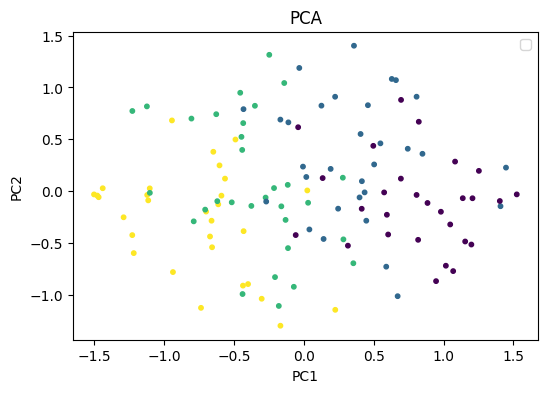

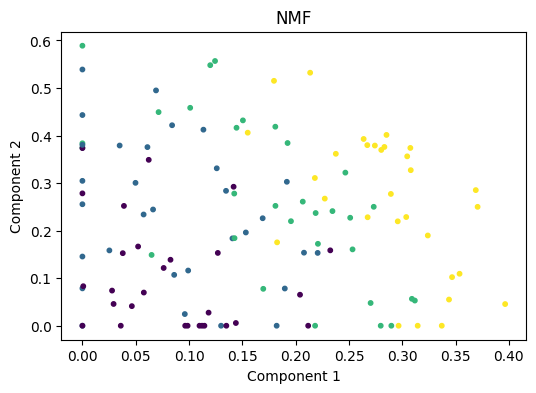

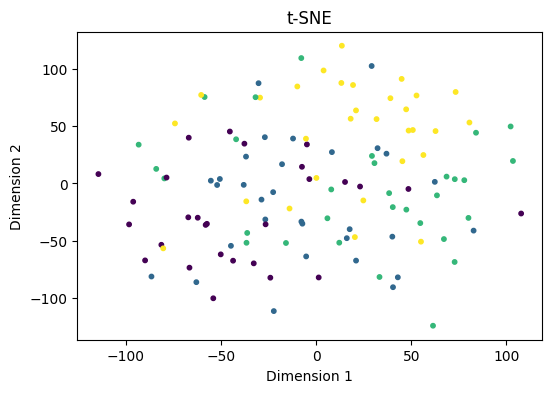

In [370]:
# PCA
plt.figure(figsize=(6, 4))
plt.scatter(X_pca[:, 0], X_pca[:, 1],c = df['Expert Diagnose'], cmap='viridis', s=10)
plt.legend()
plt.title('PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# NMF
plt.figure(figsize=(6, 4))
plt.scatter(X_nmf[:, 0], X_nmf[:, 1],c = df['Expert Diagnose'], cmap='viridis', s=10)
plt.title('NMF')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

# t-SNE
plt.figure(figsize=(6, 4))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=df['Expert Diagnose'], cmap='viridis', s=10)
plt.title('t-SNE')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

# Wnioskowanie:
# Wykresy pokazują, jak każda technika redukcji wymiarowości przedstawia dane w dwóch wymiarach.
# Można zaobserwować różnice w sposobie grupowania danych przez każdą z metod.


/var/folders/t0/sq_1cnpj20zcbxrp_r9hny540000gn/T/ipykernel_33476/2222543636.py:37: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca[:, 0], X_pca[:, 1], c=sentiment_colors, cmap='viridis')


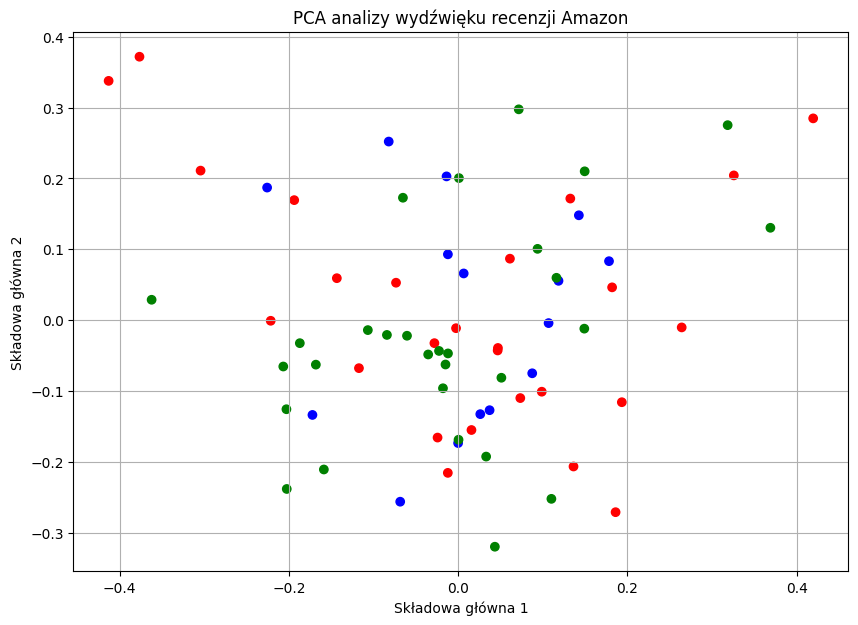

In [371]:
# Wczytanie danych
column_names = ['rating','title', 'reviewText']

df = pd.read_csv("amazonreviews/amazonreviews1.csv", names=column_names, header=None, index_col=False)  # Zmień nazwę pliku, jeśli jest inna




# Mapowanie ratingów na etykiety sentymentu
def map_sentiment(rating):
    if rating <= 2:
        return 'negative'
    elif rating == 3:
        return 'neutral'
    else:
        return 'positive'

df['sentiment'] = df['rating'].apply(map_sentiment)

# Usuwanie wierszy z brakującym tekstem
df = df.dropna(subset=['reviewText'])

# Wektoryzacja tekstu recenzji (TF-IDF)
vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = vectorizer.fit_transform(df["reviewText"]).toarray()

# Redukcja wymiarowości PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_tfidf)

# Kolorowanie punktów według sentymentu
colors = {'positive': 'green', 'negative': 'red', 'neutral': 'blue'}
sentiment_colors = df['sentiment'].map(colors)

# Wizualizacja
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=sentiment_colors, cmap='viridis')
plt.title("PCA analizy wydźwięku recenzji Amazon")
plt.xlabel("Składowa główna 1")
plt.ylabel("Składowa główna 2")
plt.grid(True)
plt.show()



In [372]:
# 1. Wczytanie danych
categories = ['rec.autos', 'rec.sport.baseball', 'sci.med', 'sci.space']
data = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))
documents = data.data[:100]

# 2. TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_tfidf = vectorizer.fit_transform(documents)

# 3. SVD
svd = TruncatedSVD(n_components=100, random_state=42)
X_reduced = svd.fit_transform(X_tfidf)

# 4. Ocena
print("TF-IDF shape:", X_tfidf.shape)
print("Reduced shape:", X_reduced.shape)
print("Explained variance ratio (sum):", round(svd.explained_variance_ratio_.sum(), 3))

# 5. Przykład dokumentu
i = 0
print("\nOriginal document:\n", documents[i][:500], "...\n")
print("TF-IDF vector (non-zero indices):", np.nonzero(X_tfidf[i])[1])

# Zaokrąglenie i wyświetlenie redukcji
rounded_vector = np.round(X_reduced[i], 3)
print("\nSVD reduced vector:\n", rounded_vector.tolist())

df = pd.DataFrame(np.round(X_reduced[:5], 3), columns=[f"Topic_{i+1}" for i in range(X_reduced.shape[1])])
df.insert(0, "Doc_ID", [f"Doc_{i+1}" for i in range(5)])
print("\nTabela zredukowanych wektorów (pierwsze 5 dokumentów):")
print(df)


TF-IDF shape: (100, 1000)
Reduced shape: (100, 100)
Explained variance ratio (sum): 1.0

Original document:
 What exactly are knots, those sore, tight spots in your muscles?
In certain kinds of massage, people try and break up these knots; it this
really helpful?
 ...

TF-IDF vector (non-zero indices): [263 421 890 139 419 565 920 711]

SVD reduced vector:
 [0.094, -0.025, 0.037, -0.006, -0.05, -0.157, -0.019, 0.002, -0.008, -0.075, 0.314, 0.017, 0.142, 0.3, -0.022, 0.232, -0.052, -0.059, 0.312, -0.044, -0.066, 0.272, 0.148, 0.161, 0.034, 0.164, 0.091, 0.005, -0.079, 0.073, -0.047, 0.066, -0.016, 0.09, -0.021, 0.024, 0.001, 0.038, 0.033, 0.027, -0.041, 0.078, -0.07, -0.001, 0.085, 0.021, -0.08, -0.098, -0.032, 0.026, 0.052, 0.036, 0.037, -0.004, -0.006, 0.04, 0.009, 0.018, -0.025, -0.06, -0.151, -0.071, -0.03, -0.001, 0.043, 0.073, -0.16, 0.019, 0.089, -0.172, 0.204, -0.001, 0.118, 0.223, -0.017, 0.024, 0.175, -0.053, 0.005, 0.097, -0.132, -0.153, 0.061, -0.091, 0.012, -0.064, 0.085, 0

Temat 1:  use, like, don, good, does, know, work, ground, wire, used
Temat 2:  team, game, 10, 25, 55, play, 11, season, 12, 16
Temat 3:  people, don, think, mr, president, know, just, stephanopoulos, going, like


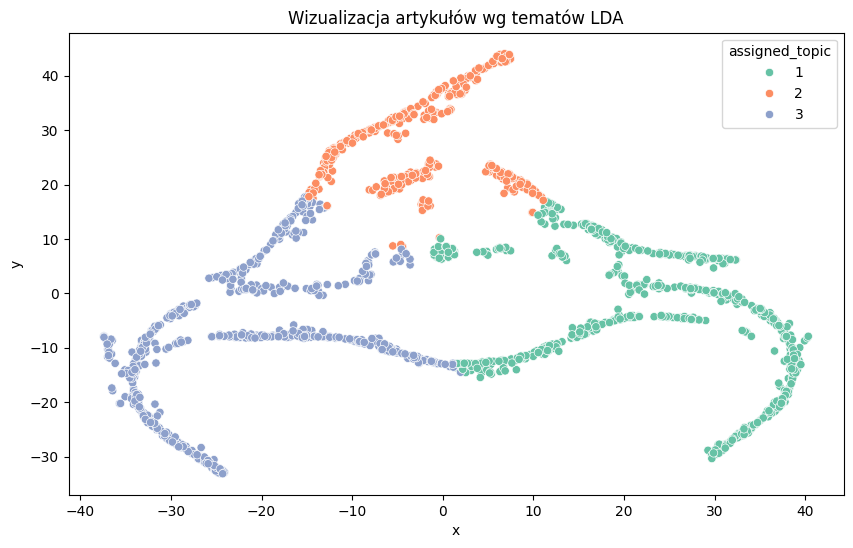

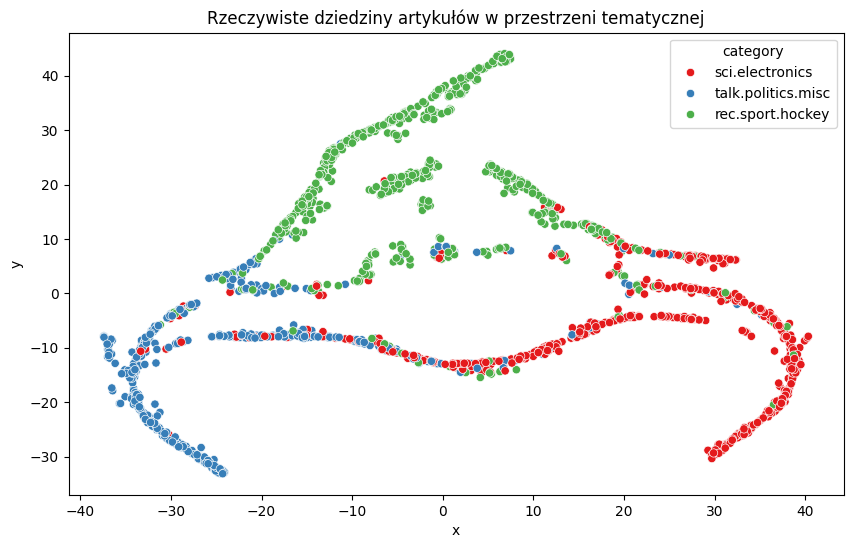

In [374]:
# Wczytaj dane (ograniczone do kilku kategorii dla czytelności)
categories = ['sci.electronics', 'talk.politics.misc', 'rec.sport.hockey']
newsgroups = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))
texts = newsgroups.data
labels = newsgroups.target
label_names = newsgroups.target_names

# Przekształcanie tekstu do macierzy cech
vectorizer = CountVectorizer(max_df=0.95, min_df=5, stop_words='english')
dtm = vectorizer.fit_transform(texts)

# LDA
lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(dtm)

# Wyświetl słowa kluczowe dla każdego tematu
words = np.array(vectorizer.get_feature_names_out())
for idx, topic in enumerate(lda.components_):
    print(f"Temat {idx + 1}: ", ", ".join(words[topic.argsort()[:-11:-1]]))

# Przypisanie tematów artykułom
topic_values = lda.transform(dtm)
assigned_topics = topic_values.argmax(axis=1)

# Redukcja wymiarów t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=40)
tsne_result = tsne.fit_transform(topic_values)

# Tworzenie DataFrame do wizualizacji
df = pd.DataFrame({
    'x': tsne_result[:, 0],
    'y': tsne_result[:, 1],
    'assigned_topic': assigned_topics+1,
    'category': [label_names[i] for i in labels]
})

# Wizualizacja przypisanych tematów LDA
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='x', y='y', hue='assigned_topic', palette='Set2')
plt.title("Wizualizacja artykułów wg tematów LDA")
plt.show()

# Wizualizacja rzeczywistych kategorii artykułów
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='x', y='y', hue='category', palette='Set1')
plt.title("Rzeczywiste dziedziny artykułów w przestrzeni tematycznej")
plt.show()
